<a href="https://colab.research.google.com/github/raymec/keras/blob/main/Project_2_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spring 2022
# CPSC 585 Project 2
## Raymond Carpio
## Yu Pan
## Sijie Shang
## John Tu

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from dataset import * # Import the entire dataset
import random # Needed to generate random numbers
import numpy as np # Needed to do NumPy functions
from matplotlib import pyplot as plt # Needed to do matplotlib graphs

print("TRAINING_SET: ", TRAINING_SET[0])
print("TEST_SET: ", TEST_SET[0])
print("MESSAGE: ", MESSAGE[0])

TRAINING_SET:  ('A', [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
TEST_SET:  ('A', [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,

# 1. As with Project 1, convert the images in TRAINING_SET, TEST_SET, and MESSAGE into two-dimensional NumPy arrays of size (# examples × # features).

In [ ]:
def show(image):
    letter_len = len(image)
    counter = 0
    for x in range(letter_len):
        if image[x] == 1:
            print('#', end='')
        else:
            print(' ', end='')
        counter += 1
        if counter == 16:
            counter = 0
            print('\n', end='')

In [ ]:
def convert_2d_array(input_data):
    if len(input_data) == 0:
        return None
    output_data = []
    if len(input_data[0]) == 2:
        for x, y in input_data:
            output_data.append(np.array(y))
    else:
        for x in input_data:
            output_data.append(np.array(x))
    return np.array(output_data)

def letter_list(input_data):
    if len(input_data) == 0:
        return None
    output_data = []
    if len(input_data[0]) == 2:
        for x, y in input_data:
            output_data.append(np.array(x))
    return np.array(output_data)

TRAINING_SET_2D = convert_2d_array(TRAINING_SET)
TEST_SET_2D = convert_2d_array(TEST_SET)
MESSAGE_2D = convert_2d_array(MESSAGE)

# Verify that each 2-dimensional NumPy array contains the same number of elements from the original arrays.
print(TRAINING_SET_2D.shape)
print(TEST_SET_2D.shape)
print(MESSAGE_2D.shape)

print("\nThe image of the first letter: \n")
show(TRAINING_SET_2D[0])

letter_list_train=letter_list(TRAINING_SET)
letter_list_test=letter_list(TEST_SET)
print('The letter list: ',letter_list)


(52, 256)
(26, 256)
(31, 256)

The image of the first letter: 

    ####        
    ####        
  ########      
  ########      
####    ####    
####    ####    
####    ####    
####    ####    
############    
############    
####    ####    
####    ####    
####    ####    
####    ####    
                
                
The letter list:  <function letter_list at 0x7f2255967ef0>


# 2. Rather than training 26 different perceptrons as you did in Project 1, this time you will use a single network with 26 possible outputs.
# In order to use the character labels in TRAINING_SET and TEST_SET, convert them into integer class vectors using ord(), then into 26 one-hot encoded categorical features.

In [ ]:
import tensorflow as tf

In [ ]:
unicode_letters_train, unicode_letters_test = [], []
for i in letter_list_train:
  unicode_char=ord(i)-ord('A')
  unicode_letters_train.append(unicode_char)

print(unicode_letters_train)

unicode_cat_train = tf.keras.utils.to_categorical(unicode_letters_train, num_classes=None, dtype="float32")

unicode_cat_train

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]


array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [ ]:
for i in letter_list_test:
  unicode_char=ord(i)-ord('A')
  unicode_letters_test.append(unicode_char)

print(unicode_letters_test)

unicode_cat_test = tf.keras.utils.to_categorical(unicode_letters_test, num_classes=None, dtype="float32")

unicode_cat_test

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]


array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 

# 3. Create a Sequential Keras model with a Dense hidden layer and a Dense output layer with softmax activation and categorical cross-entropy loss.

In [ ]:
# Create a sequential model with two Dense layers:
# One as a hidden layer and the other as an output layer
model = tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=(256,)))
model.add(tf.keras.layers.Dense(32, activation=tf.keras.activations.relu, name="Hidden_layer"))
model.add(tf.keras.layers.Dense(26, activation=tf.keras.activations.softmax, name="Output_layer"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_layer (Dense)        (None, 32)                8224      
                                                                 
 Output_layer (Dense)        (None, 26)                858       
                                                                 
Total params: 9,082
Trainable params: 9,082
Non-trainable params: 0
_________________________________________________________________


# 4. compile and fit the model to the training set. Train the model until the accuracy is as high as possible. You may wish to use an EarlyStopping callback.

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
             loss=tf.keras.losses.CategoricalCrossentropy(),
             metrics=[tf.keras.metrics.CategoricalAccuracy()])

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor="categorical_accuracy", patience=50, restore_best_weights=False)
model.fit(x=TRAINING_SET_2D, y=unicode_cat_train, epochs=9999, verbose=2, callbacks=[callback])

Epoch 1/9999
2/2 - 1s - loss: 3.4528 - categorical_accuracy: 0.0385 - 578ms/epoch - 289ms/step
Epoch 2/9999
2/2 - 0s - loss: 3.3588 - categorical_accuracy: 0.0385 - 13ms/epoch - 6ms/step
Epoch 3/9999
2/2 - 0s - loss: 3.2932 - categorical_accuracy: 0.0385 - 10ms/epoch - 5ms/step
Epoch 4/9999
2/2 - 0s - loss: 3.2432 - categorical_accuracy: 0.0192 - 9ms/epoch - 4ms/step
Epoch 5/9999
2/2 - 0s - loss: 3.1978 - categorical_accuracy: 0.0385 - 8ms/epoch - 4ms/step
Epoch 6/9999
2/2 - 0s - loss: 3.1630 - categorical_accuracy: 0.0385 - 7ms/epoch - 4ms/step
Epoch 7/9999
2/2 - 0s - loss: 3.1278 - categorical_accuracy: 0.0769 - 8ms/epoch - 4ms/step
Epoch 8/9999
2/2 - 0s - loss: 3.0921 - categorical_accuracy: 0.0962 - 7ms/epoch - 4ms/step
Epoch 9/9999
2/2 - 0s - loss: 3.0600 - categorical_accuracy: 0.0769 - 8ms/epoch - 4ms/step
Epoch 10/9999
2/2 - 0s - loss: 3.0291 - categorical_accuracy: 0.1346 - 7ms/epoch - 4ms/step
Epoch 11/9999
2/2 - 0s - loss: 2.9985 - categorical_accuracy: 0.1538 - 8ms/epoch - 

# 5. evaluate the model on TEST_SET. What accuracy do you obtain? If the accuracy is less than 100%, which test images are misclassified? (You may wish to use the show(image) function you defined in the previous project.)

In [ ]:
model.evaluate(x=TEST_SET_2D, y=unicode_cat_test, verbose=1)


1/1 [==============================] - 0s 145ms/step - loss: 1.9801 - categorical_accuracy: 0.5000


[1.9801195859909058, 0.5]

In [ ]:
predicted = model.predict(TEST_SET_2D)
predicted

array([[1.02513505e-03, 3.05083375e-02, 1.79769713e-02, 5.16004376e-02,
        4.39267084e-02, 7.06898107e-04, 1.44235343e-01, 2.03023804e-03,
        9.75096226e-03, 1.76142610e-04, 3.09254765e-03, 5.35802722e-01,
        9.51141957e-03, 4.13988065e-03, 7.14969635e-03, 5.21164900e-03,
        5.12696616e-03, 4.98341247e-02, 1.90750360e-02, 2.04650103e-03,
        4.53977194e-03, 1.98147772e-03, 1.55633613e-02, 2.43702685e-04,
        2.17422564e-03, 3.25696878e-02],
       [5.12878432e-05, 2.19780371e-01, 6.22161618e-03, 2.93662269e-02,
        1.81281149e-01, 1.06917266e-02, 1.48294738e-03, 1.04586792e-03,
        4.70995754e-02, 4.98107285e-04, 8.61471221e-02, 3.94728370e-02,
        1.62258968e-02, 5.51158935e-03, 4.42455959e-04, 7.64014274e-02,
        1.00408925e-03, 1.84742808e-02, 2.79935766e-02, 3.85767482e-02,
        5.44883696e-05, 3.30274255e-04, 9.71107802e-04, 8.56651925e-03,
        1.14271464e-02, 1.70881540e-01],
       [2.75984546e-03, 2.37952080e-02, 5.48033118e-01

In [ ]:
result_list = []
for num in range(len(predicted)):
    max_val = 0
    actual = chr(num+ord('A'))
    max_val = predicted[num].argmax() # Return the index that contains the largest value.
    predict = chr(int(max_val)+ord('A'))
    result_list.append([actual, predict])
result_list

[['A', 'L'],
 ['B', 'B'],
 ['C', 'C'],
 ['D', 'D'],
 ['E', 'E'],
 ['F', 'F'],
 ['G', 'G'],
 ['H', 'M'],
 ['I', 'I'],
 ['J', 'J'],
 ['K', 'K'],
 ['L', 'E'],
 ['M', 'F'],
 ['N', 'N'],
 ['O', 'D'],
 ['P', 'P'],
 ['Q', 'G'],
 ['R', 'P'],
 ['S', 'E'],
 ['T', 'J'],
 ['U', 'L'],
 ['V', 'G'],
 ['W', 'C'],
 ['X', 'M'],
 ['Y', 'Y'],
 ['Z', 'Z']]

In [ ]:
list_misclassified = []
num_total, num_correct = 26, 26
for i in range(len(result_list)):
    if result_list[i][0] != result_list[i][1]:
        num_correct -= 1
        list_misclassified.append([result_list[i][0], result_list[i][1]])
print("Number of images correctly classified: {}%".format((num_correct/num_total)*100))
if len(list_misclassified) == 0:
    print("All test images are classified correctly.")
else:
    print("Here are the list of test images that are misclassified and how they appear:")
    print("Actual    Predicted")
    for i in range(len(list_misclassified)):
        print("{}         {}".format(list_misclassified[i][0], list_misclassified[i][1]))

In [ ]:
# Use show() to display the misclassified images.
for j in range(len(list_misclassified)):
    # Subtract unicode value of current letter from uppercase A to obtain the letter's position.
    letter_train = ord(list_misclassified[j][0]) - ord('A')
    letter_test = ord(list_misclassified[j][1]) - ord('A')
    print("================================================")
    print("Expected letter:")
    show(TRAINING_SET_2D[letter_train])
    print("Predicted letter:")
    show(TEST_SET_2D[letter_test])
    print("================================================")

Expected letter:
    ####        
    ####        
  ########      
  ########      
####    ####    
####    ####    
####    ####    
####    ####    
############    
############    
####    ####    
####    ####    
####    ####    
####    ####    
                
                
Predicted letter:
  ######        
  ######        
    ##          
    ##          
    ##          
    ##          
    ##          
    ##          
    ##          
    ##          
    ##      ##  
    ##      ##  
  ############  
  ############  
                
                
Expected letter:
####    ####    
####    ####    
####    ####    
####    ####    
####    ####    
####    ####    
############    
############    
####    ####    
####    ####    
####    ####    
####    ####    
####    ####    
####    ####    
                
                
Predicted letter:
  ####      ####
  ####      ####
  ##  ##  ##  ##
  ##  ##  ##  ##
  ##    ##    ##
  ##    ##    ##
  ##        

In [ ]:
# Predict how the message will appear via Keras Sequential model.
predicted_message = model.predict(MESSAGE_2D)
predicted_message

array([[4.85460361e-04, 3.89215129e-04, 5.43438643e-03, 1.60095620e-03,
        9.30173323e-02, 3.20525505e-02, 6.33868622e-03, 1.66265219e-02,
        1.35281542e-02, 5.47677934e-01, 4.26922273e-03, 9.60822916e-04,
        1.27501099e-03, 8.39457571e-05, 1.43077364e-03, 3.82391299e-04,
        9.52755883e-02, 7.08355568e-04, 2.32306886e-02, 1.43190464e-02,
        3.60464142e-03, 2.04511511e-04, 1.29180704e-03, 1.47984093e-02,
        1.13429297e-02, 1.09670691e-01],
       [1.29211193e-03, 5.78566454e-02, 5.02690813e-03, 8.53054971e-03,
        2.79186890e-02, 8.46019760e-03, 2.57579833e-02, 1.12247407e-01,
        1.65133958e-03, 1.37217241e-04, 5.19385487e-02, 4.16669659e-02,
        1.35838851e-01, 1.73883528e-01, 5.74918976e-03, 4.68292050e-02,
        5.16822934e-03, 6.43497109e-02, 5.96362799e-02, 1.14208262e-03,
        1.70126930e-02, 2.05447003e-02, 9.99923423e-02, 4.28957492e-03,
        1.19399140e-02, 1.11391442e-02],
       [2.89994641e-05, 9.91124474e-03, 4.20511654e-03

In [ ]:
message_list = ""
for num in range(len(predicted_message)):
    max_val = 0
    max_val = predicted_message[num].argmax() # Return the index that contains the largest value.
    predict = chr(int(max_val)+ord('A'))
    message_list += predict
print(message_list)

JNEFIVEBOYINGWIZAPDSJUMPQUICKLY


In [ ]:
actual_message = "THEFIVEBOXINGWIZARDSJUMPQUICKLY"
list_mismatch = []
num_total, num_correct = len(actual_message), len(message_list)
for i in range(len(actual_message)):
    if message_list[i] != actual_message[i]:
        num_correct -= 1
        list_mismatch.append([actual_message[i], message_list[i]])
print("Accuracy between predicted and actual message: {}%".format((num_correct/num_total)*100))
if len(list_mismatch) == 0:
    print("The message appears to be decoded correctly.")
else:
    print("Here is the list of letters that are a mismatch between predicted and actual message:")
    print("Actual    Predicted")
    for i in range(len(list_mismatch)):
        print("{}         {}".format(list_mismatch[i][0], list_mismatch[i][1]))

Accuracy between predicted and actual message: 87.09677419354838%
Here is the list of letters that are a mismatch between predicted and actual message:
Actual    Predicted
T         J
H         N
X         Y
R         P


# 6. How does this model compare with the performance of your perceptron models in Project 1?

## A: The evaluation accuracy of the Keras Sequential model for TEST_SET is 50%, which is lower than the ~70% evaluation accuracy of the Project 1 perceptron models for TEST_SET. However, the prediction accuracy of the model on MESSAGE is 87%, which is higher than the 76-77% prediction accuracy for MESSAGE of the perceptron models in Project 1. 

## To ensure that the large discrepancy between TEST_SET and MESSAGE accuracy was not due to coding or model errors, we swapped one set of letters in TRAINING_SET with the set of letters in TEST_SET and retrained the model on the swapped sets, then evaluated its accuracy and ran it again on MESSAGE. We obtained results similar to the ones for the unswapped sets, indicating that there is likely no issue with our model or code. 

## We therefore propose that the discrepancy between TEST_SET and MESSAGE accuracy for our Keras sequential model is due to the fact that the Keras sequential model performed better than the Project 1 perceptron model on TRAINING_SET (100% for the Keras model vs. 96% for the Project 1 perceptron), which makes up a majority of the letters in MESSAGE. Because only a minority of letters in MESSAGE come from TEST_SET, the Keras model's decreased accuracy on TEST_SET did not have much of an effect on its accuracy for MESSAGE.

## Note: Although TEST_SET was only meant to be used with model.evaluate, we decided to also run model.predict on it to see if our results were consistent, due to the low accuracy we obtained with model.evaluate. 

# 7. All of the letters in MESSAGE were likely not decoded correctly, so let’s try to improve the performance of the model by adding additional hidden layers. Add two additional hidden layers of the same size as your original hidden layer, then repeat experiments (4) and (5).

In [ ]:
print(MESSAGE_2D.shape)
show(MESSAGE_2D[0])
print(MESSAGE)
message_list=['']

(31, 256)
  ##############
  ############# 
  ##    ##    ##
  ##    ##    ##
        ##      
        ##      
        ##      
        ##      
        ##      
   #    ##    # 
        ##      
        ##      
      ######    
      ######    
  #             
                
[[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
# Do experiments 4 and 5 again, but this time, add two more hidden layers.
model2 = tf.keras.models.Sequential()
model2.add(tf.keras.Input(shape=(256,)))
model2.add(tf.keras.layers.Dense(32, activation=tf.keras.activations.relu, name="Hidden_layer1"))
model2.add(tf.keras.layers.Dense(32, activation=tf.keras.activations.relu, name="Hidden_layer2"))
model2.add(tf.keras.layers.Dense(32, activation=tf.keras.activations.relu, name="Hidden_layer3"))
model2.add(tf.keras.layers.Dense(26, activation=tf.keras.activations.softmax, name="Output_layer"))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_layer1 (Dense)       (None, 32)                8224      
                                                                 
 Hidden_layer2 (Dense)       (None, 32)                1056      
                                                                 
 Hidden_layer3 (Dense)       (None, 32)                1056      
                                                                 
 Output_layer (Dense)        (None, 26)                858       
                                                                 
Total params: 11,194
Trainable params: 11,194
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
             loss=tf.keras.losses.CategoricalCrossentropy(),
             metrics=[tf.keras.metrics.CategoricalAccuracy()])
callback = tf.keras.callbacks.EarlyStopping(monitor="categorical_accuracy", patience=50, restore_best_weights=False)
model2.fit(x=TRAINING_SET_2D, y=unicode_cat_train, epochs=9999, verbose=2, callbacks=[callback])

Epoch 1/9999
2/2 - 0s - loss: 3.2773 - categorical_accuracy: 0.0385 - 423ms/epoch - 211ms/step
Epoch 2/9999
2/2 - 0s - loss: 3.2457 - categorical_accuracy: 0.0577 - 15ms/epoch - 8ms/step
Epoch 3/9999
2/2 - 0s - loss: 3.2202 - categorical_accuracy: 0.1346 - 8ms/epoch - 4ms/step
Epoch 4/9999
2/2 - 0s - loss: 3.1997 - categorical_accuracy: 0.1154 - 8ms/epoch - 4ms/step
Epoch 5/9999
2/2 - 0s - loss: 3.1795 - categorical_accuracy: 0.1538 - 7ms/epoch - 3ms/step
Epoch 6/9999
2/2 - 0s - loss: 3.1603 - categorical_accuracy: 0.2115 - 13ms/epoch - 6ms/step
Epoch 7/9999
2/2 - 0s - loss: 3.1441 - categorical_accuracy: 0.2308 - 8ms/epoch - 4ms/step
Epoch 8/9999
2/2 - 0s - loss: 3.1242 - categorical_accuracy: 0.2115 - 8ms/epoch - 4ms/step
Epoch 9/9999
2/2 - 0s - loss: 3.1028 - categorical_accuracy: 0.2500 - 8ms/epoch - 4ms/step
Epoch 10/9999
2/2 - 0s - loss: 3.0810 - categorical_accuracy: 0.2500 - 7ms/epoch - 4ms/step
Epoch 11/9999
2/2 - 0s - loss: 3.0560 - categorical_accuracy: 0.2692 - 10ms/epoch -

In [ ]:
model2.evaluate(x=TEST_SET_2D, y=unicode_cat_test, verbose=1)

1/1 [==============================] - 0s 123ms/step - loss: 2.4804 - categorical_accuracy: 0.3077


[2.480441093444824, 0.3076923191547394]

In [ ]:
predicted = model2.predict(TEST_SET_2D)
predicted

array([[1.82913095e-02, 1.68427125e-01, 1.74321376e-05, 4.22803700e-01,
        3.48201167e-04, 3.15022908e-06, 1.96054634e-02, 9.47539320e-06,
        1.58396381e-06, 5.25133172e-03, 9.22899395e-02, 1.76730286e-02,
        1.63285695e-05, 5.67880961e-05, 1.80735125e-03, 2.03774645e-04,
        7.19323056e-04, 1.92173272e-01, 5.04782945e-02, 2.45397352e-03,
        2.30785296e-03, 1.75157184e-04, 4.37747501e-03, 3.50862538e-04,
        1.04195598e-04, 5.35887666e-05],
       [2.81373541e-05, 5.91632366e-01, 3.12450551e-03, 8.81156418e-03,
        1.14239263e-03, 4.66961268e-04, 1.07252020e-02, 2.10545477e-06,
        3.52582720e-04, 2.53889966e-03, 1.94138605e-02, 8.93260632e-03,
        1.35413256e-05, 1.90700416e-06, 5.43442256e-05, 2.58376330e-01,
        1.02746271e-05, 3.67104053e-03, 5.51310144e-02, 3.29028592e-02,
        1.90439896e-05, 2.70125292e-05, 1.46289076e-05, 3.16921910e-06,
        8.56798506e-05, 2.51801638e-03],
       [1.40115895e-04, 4.01023030e-02, 6.77361786e-01

In [ ]:
result_list = []
for num in range(len(predicted)):
    max_val = 0
    actual = chr(num+ord('A'))
    max_val = predicted[num].argmax() # Return the index that contains the largest value.
    predict = chr(int(max_val)+ord('A'))
    result_list.append([actual, predict])
result_list

[['A', 'D'],
 ['B', 'B'],
 ['C', 'C'],
 ['D', 'B'],
 ['E', 'K'],
 ['F', 'F'],
 ['G', 'G'],
 ['H', 'R'],
 ['I', 'I'],
 ['J', 'J'],
 ['K', 'K'],
 ['L', 'B'],
 ['M', 'K'],
 ['N', 'R'],
 ['O', 'G'],
 ['P', 'P'],
 ['Q', 'D'],
 ['R', 'S'],
 ['S', 'B'],
 ['T', 'S'],
 ['U', 'Z'],
 ['V', 'L'],
 ['W', 'X'],
 ['X', 'T'],
 ['Y', 'Q'],
 ['Z', 'S']]

In [ ]:
list_misclassified = []
num_total, num_correct = 26, 26
for i in range(len(result_list)):
    if result_list[i][0] != result_list[i][1]:
        num_correct -= 1
        list_misclassified.append([result_list[i][0], result_list[i][1]])
print("Number of images correctly classified: {}%".format((num_correct/num_total)*100))
if len(list_misclassified) == 0:
    print("All test images are classified correctly.")
else:
    print("Here are the list of test images that are misclassified and how they appear:")
    print("Actual    Predicted")
    for i in range(len(list_misclassified)):
        print("{}         {}".format(list_misclassified[i][0], list_misclassified[i][1]))

Number of images correctly classified: 30.76923076923077%
Here are the list of test images that are misclassified and how they appear:
Actual    Predicted
A         D
D         B
E         K
H         R
L         B
M         K
N         R
O         G
Q         D
R         S
S         B
T         S
U         Z
V         L
W         X
X         T
Y         Q
Z         S


In [ ]:
# Use show() to display the misclassified images.
for j in range(len(list_misclassified)):
    # Subtract unicode value of current letter from uppercase A to obtain the letter's position.
    letter_train = ord(list_misclassified[j][0]) - ord('A')
    letter_test = ord(list_misclassified[j][1]) - ord('A')
    print("================================================")
    print("Expected letter:")
    show(TRAINING_SET_2D[letter_train])
    print("Predicted letter:")
    show(TEST_SET_2D[letter_test])
    print("================================================")

Expected letter:
    ####        
    ####        
  ########      
  ########      
####    ####    
####    ####    
####    ####    
####    ####    
############    
############    
####    ####    
####    ####    
####    ####    
####    ####    
                
                
Predicted letter:
  ########      
  ########      
    ##    ##    
    ##    ##    
    ##      ##  
    ##      ##  
    ##      ##  
    ##      ##  
    ##      ##  
    ##      ##  
    ##    ##    
    ##    ##    
  ########      
  ########      
                
                
Expected letter:
##########      
##########      
  ####  ####    
  ####  ####    
  ####    ####  
  ####    ####  
  ####    ####  
  ####    ####  
  ####    ####  
  ####    ####  
  ####  ####    
  ####  ####    
##########      
##########      
                
                
Predicted letter:
  ##########    
  ##########    
    ##      ##  
    ##      ##  
    ##      ##  
    ##      ##  
    ########

In [ ]:
predicted_message = model2.predict(MESSAGE_2D)
predicted_message

array([[4.19235788e-03, 9.54179466e-02, 3.98580991e-02, 3.27252597e-03,
        4.40965174e-03, 2.23761629e-02, 6.98719174e-02, 2.13275052e-04,
        1.14055410e-01, 1.13658823e-01, 1.36912242e-02, 1.79470517e-04,
        7.24958838e-04, 3.97980120e-03, 3.62006319e-03, 5.11000445e-03,
        2.46747746e-03, 6.73686527e-03, 4.15984005e-01, 5.50851226e-02,
        2.39575678e-03, 4.35636139e-05, 9.15596844e-04, 1.66770665e-03,
        4.82228771e-03, 1.52499396e-02],
       [2.50387122e-04, 1.37714832e-03, 3.91815320e-06, 8.17092042e-03,
        3.33481492e-03, 1.11306188e-04, 9.74598006e-05, 2.37979181e-03,
        2.78065837e-08, 1.04575558e-03, 1.85229387e-02, 2.15692353e-02,
        5.21276072e-02, 2.21207179e-03, 1.07238506e-04, 5.26612275e-05,
        3.83013721e-05, 8.22416008e-01, 7.16520939e-03, 1.97754489e-04,
        8.01461574e-04, 1.45595804e-05, 2.22544745e-02, 3.54472287e-02,
        1.30320885e-04, 1.71255873e-04],
       [1.68585677e-06, 3.12777306e-03, 6.21357831e-05

In [ ]:
message_list = ""
for num in range(len(predicted_message)):
    max_val = 0
    max_val = predicted_message[num].argmax() # Return the index that contains the largest value.
    predict = chr(int(max_val)+ord('A'))
    message_list += predict
print(message_list)

SREFIVSBOYINGWISASPSJUMPQUICKLY


In [ ]:
actual_message = "THEFIVEBOXINGWIZARDSJUMPQUICKLY"
list_mismatch = []
num_total, num_correct = len(actual_message), len(message_list)
for i in range(len(actual_message)):
    if message_list[i] != actual_message[i]:
        num_correct -= 1
        list_mismatch.append([actual_message[i], message_list[i]])
print("Accuracy between predicted and actual message: {}%".format((num_correct/num_total)*100))
if len(list_mismatch) == 0:
    print("The message appears to be decoded correctly.")
else:
    print("Here is the list of letters that are a mismatch between predicted and actual message:")
    print("Actual    Predicted")
    for i in range(len(list_mismatch)):
        print("{}         {}".format(list_mismatch[i][0], list_mismatch[i][1]))

Accuracy between predicted and actual message: 77.41935483870968%
Here is the list of letters that are a mismatch between predicted and actual message:
Actual    Predicted
T         S
H         R
E         S
X         Y
Z         S
R         S
D         P


# Does the performance improve?

## A: No, the performance does not improve simply by adding more hidden layers. The test set accuracy decreases after we add more layers.

# 8. Repeat experiment (7), adding additional layers of the same size until the message is decoded correctly. What results do you observe?

In [ ]:
model3 = tf.keras.models.Sequential()
model3.add(tf.keras.Input(shape=(256,)))
model3.add(tf.keras.layers.Dense(32, activation=tf.keras.activations.relu, name="Hidden_layer1"))
model3.add(tf.keras.layers.Dense(32, activation=tf.keras.activations.relu, name="Hidden_layer2"))
model3.add(tf.keras.layers.Dense(32, activation=tf.keras.activations.relu, name="Hidden_layer3"))
model3.add(tf.keras.layers.Dense(32, activation=tf.keras.activations.relu, name="Hidden_layer4"))
model3.add(tf.keras.layers.Dense(32, activation=tf.keras.activations.relu, name="Hidden_layer5"))
model3.add(tf.keras.layers.Dense(32, activation=tf.keras.activations.relu, name="Hidden_layer6"))
model3.add(tf.keras.layers.Dense(32, activation=tf.keras.activations.relu, name="Hidden_layer7"))
model3.add(tf.keras.layers.Dense(32, activation=tf.keras.activations.relu, name="Hidden_layer8"))
model3.add(tf.keras.layers.Dense(32, activation=tf.keras.activations.relu, name="Hidden_layer9"))
model3.add(tf.keras.layers.Dense(32, activation=tf.keras.activations.relu, name="Hidden_layer10"))
model3.add(tf.keras.layers.Dense(26, activation=tf.keras.activations.softmax, name="Output_layer"))

model3.summary()
model3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
             loss=tf.keras.losses.CategoricalCrossentropy(),
             metrics=[tf.keras.metrics.CategoricalAccuracy()])
callback = tf.keras.callbacks.EarlyStopping(monitor="categorical_accuracy", patience=50, restore_best_weights=False)
model3.fit(x=TRAINING_SET_2D, y=unicode_cat_train, epochs=9999, verbose=2, callbacks=[callback])
#model3.evaluate(x=TEST_SET_2D, y=unicode_cat_test, verbose=1)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_layer1 (Dense)       (None, 32)                8224      
                                                                 
 Hidden_layer2 (Dense)       (None, 32)                1056      
                                                                 
 Hidden_layer3 (Dense)       (None, 32)                1056      
                                                                 
 Hidden_layer4 (Dense)       (None, 32)                1056      
                                                                 
 Hidden_layer5 (Dense)       (None, 32)                1056      
                                                                 
 Hidden_layer6 (Dense)       (None, 32)                1056      
                                                                 
 Hidden_layer7 (Dense)       (None, 32)               

In [ ]:
model3.evaluate(x=TEST_SET_2D, y=unicode_cat_test, verbose=1)

1/1 [==============================] - 0s 16ms/step - loss: 11.7844 - categorical_accuracy: 0.1538


[11.784433364868164, 0.1538461595773697]

In [ ]:
predicted = model3.predict(TEST_SET_2D)
predicted

array([[6.19115591e-24, 3.47288892e-10, 0.00000000e+00, 1.14879796e-04,
        2.72376493e-18, 3.20587897e-11, 1.72486680e-03, 2.27490879e-15,
        9.87545550e-01, 6.76126473e-18, 2.13170955e-26, 2.62273871e-03,
        2.16314318e-24, 1.56285226e-23, 1.12422742e-27, 7.98841566e-03,
        1.06680418e-26, 2.08743138e-14, 9.29345111e-18, 3.49724451e-06,
        4.18243228e-27, 1.14926187e-24, 2.39768393e-29, 4.06823016e-23,
        2.59739392e-37, 2.95056608e-27],
       [7.04015722e-16, 2.36432629e-06, 1.01475889e-28, 2.93519793e-06,
        4.16951362e-10, 3.39308535e-05, 1.14123663e-03, 4.06296004e-12,
        2.41795387e-02, 1.74913964e-14, 5.81316764e-15, 6.62881757e-06,
        1.00548751e-21, 3.12958958e-21, 1.86666292e-27, 9.74417329e-01,
        2.05733993e-23, 1.08562153e-06, 8.60766197e-14, 2.14811691e-04,
        1.30510347e-23, 5.33824245e-25, 3.94454303e-26, 9.88188976e-16,
        1.67475106e-30, 2.27709224e-17],
       [2.68326562e-06, 8.45216028e-03, 3.07506277e-11

In [ ]:
result_list = []
for num in range(len(predicted)):
    max_val = 0
    actual = chr(num+ord('A'))
    max_val = predicted[num].argmax() # Return the index that contains the largest value.
    predict = chr(int(max_val)+ord('A'))
    result_list.append([actual, predict])
result_list

[['A', 'B'],
 ['B', 'R'],
 ['C', 'E'],
 ['D', 'L'],
 ['E', 'F'],
 ['F', 'K'],
 ['G', 'E'],
 ['H', 'P'],
 ['I', 'T'],
 ['J', 'J'],
 ['K', 'I'],
 ['L', 'R'],
 ['M', 'B'],
 ['N', 'E'],
 ['O', 'A'],
 ['P', 'P'],
 ['Q', 'B'],
 ['R', 'P'],
 ['S', 'G'],
 ['T', 'M'],
 ['U', 'A'],
 ['V', 'D'],
 ['W', 'O'],
 ['X', 'Y'],
 ['Y', 'J'],
 ['Z', 'E']]

In [ ]:
list_misclassified = []
num_total, num_correct = 26, 26
for i in range(len(result_list)):
    if result_list[i][0] != result_list[i][1]:
        num_correct -= 1
        list_misclassified.append([result_list[i][0], result_list[i][1]])
print("Number of images correctly classified: {}%".format((num_correct/num_total)*100))
if len(list_misclassified) == 0:
    print("All test images are classified correctly.")
else:
    print("Here are the list of test images that are misclassified and how they appear:")
    print("Actual    Predicted")
    for i in range(len(list_misclassified)):
        print("{}         {}".format(list_misclassified[i][0], list_misclassified[i][1]))

Number of images correctly classified: 30.76923076923077%
Here are the list of test images that are misclassified and how they appear:
Actual    Predicted
A         D
D         B
E         K
H         R
L         B
M         K
N         R
O         G
Q         D
R         S
S         B
T         S
U         Z
V         L
W         X
X         T
Y         Q
Z         S


In [ ]:
# Use show() to display the misclassified images.
for j in range(len(list_misclassified)):
    # Subtract unicode value of current letter from uppercase A to obtain the letter's position.
    letter_train = ord(list_misclassified[j][0]) - ord('A')
    letter_test = ord(list_misclassified[j][1]) - ord('A')
    print("================================================")
    print("Expected letter:")
    show(TRAINING_SET_2D[letter_train])
    print("Predicted letter:")
    show(TEST_SET_2D[letter_test])
    print("================================================")

Expected letter:
    ####        
    ####        
  ########      
  ########      
####    ####    
####    ####    
####    ####    
####    ####    
############    
############    
####    ####    
####    ####    
####    ####    
####    ####    
                
                
Predicted letter:
  ########      
  ########      
    ##    ##    
    ##    ##    
    ##      ##  
    ##      ##  
    ##      ##  
    ##      ##  
    ##      ##  
    ##      ##  
    ##    ##    
    ##    ##    
  ########      
  ########      
                
                
Expected letter:
##########      
##########      
  ####  ####    
  ####  ####    
  ####    ####  
  ####    ####  
  ####    ####  
  ####    ####  
  ####    ####  
  ####    ####  
  ####  ####    
  ####  ####    
##########      
##########      
                
                
Predicted letter:
  ##########    
  ##########    
    ##      ##  
    ##      ##  
    ##      ##  
    ##      ##  
    ########

In [ ]:
predicted_message = model3.predict(MESSAGE_2D)
predicted_message

array([[5.03253190e-08, 1.35254313e-03, 1.19270392e-12, 2.86561830e-10,
        3.88984323e-01, 2.17499882e-01, 1.97457339e-08, 5.73914356e-08,
        8.01802059e-07, 1.10944420e-10, 6.88879266e-02, 9.78031736e-08,
        7.11033422e-15, 5.47312456e-15, 4.71556086e-20, 1.36504867e-04,
        2.70760285e-17, 3.22608203e-01, 2.70247852e-10, 5.96115854e-07,
        3.44538169e-16, 1.60512578e-17, 5.58285206e-18, 6.06653839e-06,
        6.78174547e-17, 5.22957824e-04],
       [3.35512413e-22, 2.57635774e-10, 3.47190085e-23, 2.65994595e-06,
        2.74391445e-22, 4.59070770e-29, 1.55936208e-21, 1.01727620e-01,
        2.11786712e-22, 6.77385742e-06, 2.78586955e-15, 3.70148392e-08,
        4.91247959e-02, 8.09161663e-01, 1.06896505e-05, 1.33921060e-24,
        2.18711719e-02, 8.48398126e-17, 1.21497673e-10, 2.30808811e-22,
        9.15256981e-03, 3.38473474e-04, 6.56698504e-03, 2.08188333e-09,
        2.03650608e-03, 1.51672255e-28],
       [1.00777507e-13, 1.62162160e-05, 1.26290075e-20

In [ ]:
message_list = ""
for num in range(len(predicted_message)):
    max_val = 0
    max_val = predicted_message[num].argmax() # Return the index that contains the largest value.
    predict = chr(int(max_val)+ord('A'))
    message_list += predict
print(message_list)

ENEFIVPBOXINGWIFAILSJUMPQUICKLY


In [ ]:
actual_message = "THEFIVEBOXINGWIZARDSJUMPQUICKLY"
list_mismatch = []
num_total, num_correct = len(actual_message), len(message_list)
for i in range(len(actual_message)):
    if message_list[i] != actual_message[i]:
        num_correct -= 1
        list_mismatch.append([actual_message[i], message_list[i]])
print("Accuracy between predicted and actual message: {}%".format((num_correct/num_total)*100))
if len(list_mismatch) == 0:
    print("The message appears to be decoded correctly.")
else:
    print("Here is the list of letters that are a mismatch between predicted and actual message:")
    print("Actual    Predicted")
    for i in range(len(list_mismatch)):
        print("{}         {}".format(list_mismatch[i][0], list_mismatch[i][1]))

Accuracy between predicted and actual message: 80.64516129032258%
Here is the list of letters that are a mismatch between predicted and actual message:
Actual    Predicted
T         E
H         N
E         P
Z         F
R         I
D         L


## A: As more hidden layers are added, the categorical accuracy obtained will gradually worsen. Although research sources stated that additional layers may decrease accuracy due to a vanishing gradient, those same sources indicate that using ReLU activation for the hidden layers solves the issue of the vanishing gradient, so our model with ReLU for the hidden layers is unlikely to experience vanishing gradient effects, and the decreased accuracy with additional layers is most likely due to overfitting. As a result, no matter how many hidden layers are added, all letters in the message will never be decoded correctly.

# 9. Load the EMNIST Letters dataset, and use plt.imshow() to verify that the image data has been loaded correctly and that the corresponding labels are correct.

In [ ]:
from matplotlib import pyplot as plt # Needed to do matplotlib operations
emnist_data = np.load('emnist_letters.npz')

train_img = emnist_data['train_images']
train_label = emnist_data['train_labels']

test_img = emnist_data['test_images']
test_label = emnist_data['test_labels']

validate_img = emnist_data['validate_images']
validate_label = emnist_data['validate_labels']


train_img = train_img.reshape((104000, 28, 28))
train_img = train_img.astype("float32") / 255
test_img = test_img.reshape((20800, 28, 28))
test_img = test_img.astype("float32") / 255
validate_img = validate_img.reshape((20800, 28, 28))
validate_img = validate_img.astype("float32") / 255

In [ ]:
print(emnist_data)
print("Train_img shape: ", train_img.shape)
print("Train_label shape: ", train_label.shape)
print("Test_img shape: ", test_img.shape)
print("Test_label shape: ", test_label.shape)
print("Validate_img shape: ", validate_img.shape)
print("Validate_label shape: ", validate_label.shape)

Train_img shape:  (104000, 28, 28)
Train_label shape:  (104000, 27)
Test_img shape:  (20800, 28, 28)
Test_label shape:  (20800, 27)
Validate_img shape:  (20800, 28, 28)
Validate_label shape:  (20800, 27)


Label of the image:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0.]
This is letter:  W


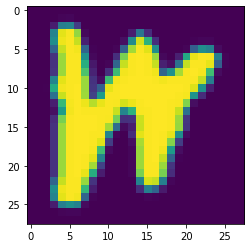

In [ ]:
# Print out the first 3 letters.
plt.imshow(train_img[0].reshape(28, 28))
print("Label of the image: ",train_label[0])
print("This is letter: ",chr(np.argmax(train_label[0])-1+ord('A')))

Label of the image:  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.]
This is letter:  G


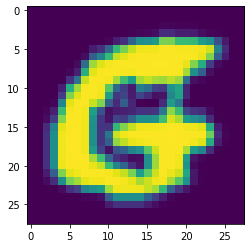

In [ ]:
plt.imshow(train_img[1].reshape(28, 28))
print("Label of the image: ",train_label[1])
print("This is letter: ",chr(np.argmax(train_label[1])-1+ord('A')))

Label of the image:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.]
This is letter:  P


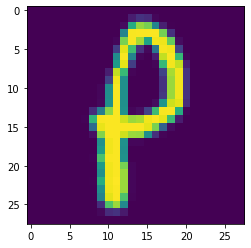

In [ ]:
plt.imshow(train_img[2].reshape(28, 28))
print("Label of the image: ",train_label[2])
print("This is letter: ",chr(np.argmax(train_label[2])-1+ord('A')))

#10.	Apply the network architecture from Chollet’s MNIST notebook to the EMNIST Letters data. (You will need to modify the numbers of inputs and outputs, but should leave the dense layer intact.) What accuracy do you achieve? How does this compare with the accuracy for MNIST?

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Flatten(),
    layers.Dense(512, activation="relu"),
    layers.Dense(27, activation="softmax")
])

In [ ]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
model.fit(train_img, train_label, epochs=5, batch_size=128)

Epoch 1/5
813/813 [==============================] - 8s 10ms/step - loss: 2.3158 - accuracy: 0.4198
Epoch 2/5
813/813 [==============================] - 7s 9ms/step - loss: 1.3933 - accuracy: 0.5997
Epoch 3/5
813/813 [==============================] - 7s 9ms/step - loss: 1.2017 - accuracy: 0.6493
Epoch 4/5
813/813 [==============================] - 7s 9ms/step - loss: 1.1179 - accuracy: 0.6725
Epoch 5/5
813/813 [==============================] - 8s 9ms/step - loss: 1.0619 - accuracy: 0.6902


In [ ]:
model.evaluate(test_img, test_label, verbose=1)

650/650 [==============================] - 2s 2ms/step - loss: 1.0466 - accuracy: 0.6953


[1.0466054677963257, 0.6952884793281555]

## A: The accuracy we obtained for the EMNIST Letters data was 70.17%, which is lower than the 98.89% accuracy that Chollet's notebook obtained for the MNIST data.

# 11.	Keeping the same number of layers in the network (i.e. an MLP with a single hidden layer), modify the architecture to improve the accuracy. You will need to decide on an appropriate number of neurons in the hidden layer. Keep in mind that:

>a.	There are 27 classes rather than 10, so you will need a larger hidden layer than the MNIST network.

>b.	In addition to having more classes, EMNIST Letters mixes upper- and lowercase letters within each class, so even with enough neurons in the hidden layer, your accuracy is likely to be lower.  See the details in the EMNIST paper for the kind of performance you might reasonably expect.

>c.	The Keras fit() method can take a validation_data parameter in order to evaluate metrics on the validation set.


In [ ]:
model2 = keras.Sequential([
    layers.Flatten(),
    layers.Dense(1024, activation="relu"),     #doubled the dense layer 512 (acc:69%)->1024 (acc:71%)
    layers.Dense(27, activation="softmax")
])

In [ ]:
model2.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
model2.fit(train_img, train_label, validation_data=(validate_img, validate_label), epochs=5, batch_size=128)

Epoch 1/5
813/813 [==============================] - 15s 19ms/step - loss: 2.1125 - accuracy: 0.4536 - val_loss: 1.4399 - val_accuracy: 0.5840
Epoch 2/5
813/813 [==============================] - 15s 18ms/step - loss: 1.2774 - accuracy: 0.6278 - val_loss: 1.1883 - val_accuracy: 0.6498
Epoch 3/5
813/813 [==============================] - 14s 18ms/step - loss: 1.1262 - accuracy: 0.6697 - val_loss: 1.0848 - val_accuracy: 0.6825
Epoch 4/5
813/813 [==============================] - 14s 18ms/step - loss: 1.0449 - accuracy: 0.6952 - val_loss: 1.0089 - val_accuracy: 0.7082
Epoch 5/5
813/813 [==============================] - 15s 18ms/step - loss: 0.9728 - accuracy: 0.7180 - val_loss: 0.9418 - val_accuracy: 0.7287


In [ ]:
model2.evaluate(test_img, test_label, verbose=1)

650/650 [==============================] - 3s 4ms/step - loss: 0.9492 - accuracy: 0.7263


[0.9491686224937439, 0.7262980937957764]

## The accuracy is 72.53%, which is a slight improvement over the accuracy from the previous problem. We also tried increasing the neuron count in the hidden layer to 10,000 as that was the number of neurons used in the network that the EMNIST paper ran on the EMNIST Letters dataset. This increased the accuracy to 84.59%, which is very close to the 85.15% accuracy obtained by the EMNIST paper network on the same dataset.

# 12. The Keras examples include a Simple MNIST convnet. Note the accuracy obtained by that code compared to the previous example from Chollet.
# Rather than building a deeper MLP, let’s apply this architecture to the EMNIST Letters data. What accuracy do you achieve? How does this compare with the accuracy for the MNIST dataset?


In [ ]:
num_classes = 27
input_shape = (28, 28, 1)

train_img = train_img.reshape(104000, 28, 28)
test_img = test_img.reshape(20800, 28, 28)

train_img_convnet = np.expand_dims(train_img, -1)
test_img_convnet = np.expand_dims(test_img, -1)


print(train_img_convnet.shape)
print(train_img_convnet[0].shape)
print(test_img_convnet.shape)
print(test_img_convnet[0].shape)

(104000, 28, 28, 1)
(28, 28, 1)
(20800, 28, 28, 1)
(28, 28, 1)


In [ ]:
model3 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)             

In [ ]:
model3.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
model3.fit(train_img_convnet, train_label, epochs=5, batch_size=128, validation_split=0.1)

Epoch 1/5
732/732 [==============================] - 68s 92ms/step - loss: 2.0930 - accuracy: 0.3938 - val_loss: 1.2943 - val_accuracy: 0.6130
Epoch 2/5
732/732 [==============================] - 67s 92ms/step - loss: 1.3100 - accuracy: 0.6090 - val_loss: 1.0664 - val_accuracy: 0.6870
Epoch 3/5
732/732 [==============================] - 67s 92ms/step - loss: 1.0786 - accuracy: 0.6746 - val_loss: 0.8243 - val_accuracy: 0.7541
Epoch 4/5
732/732 [==============================] - 67s 91ms/step - loss: 0.8723 - accuracy: 0.7376 - val_loss: 0.6606 - val_accuracy: 0.7998
Epoch 5/5
732/732 [==============================] - 67s 91ms/step - loss: 0.7543 - accuracy: 0.7708 - val_loss: 0.5702 - val_accuracy: 0.8293


In [ ]:
model3.evaluate(test_img_convnet, test_label, verbose=1)

650/650 [==============================] - 6s 9ms/step - loss: 0.5656 - accuracy: 0.8324


[0.5656337141990662, 0.832403838634491]

## The accuracy obtained is 82.10%, which is not better than the accuracy for MNIST, although it is a significant improvement over the previous models we used on the EMNIST Letters data set.

# 13. Use plt.imshow() to view some of the misclassified images and examine their labels. Describe what you think might have gone wrong.

In [ ]:
# Only plt.imshow() will be used to view the misclassified images.
misclassified_images = []
for i in range(200):
    predict_image = model.predict(test_img[i].reshape(1, 28, 28))
    predict_letter = chr(np.argmax(predict_image)-1+ord('A'))
    actual_letter = chr(np.argmax(test_label[i])-1+ord('A'))
    if predict_letter != actual_letter:
        misclassified_images.append(i)
print("List of images that appears to be misclassified:")
print(misclassified_images)

List of images that appears to be misclassified:
[0, 1, 3, 4, 8, 10, 12, 13, 14, 16, 18, 19, 21, 22, 27, 33, 34, 36, 37, 41, 44, 45, 47, 48, 51, 52, 56, 57, 58, 59, 66, 69, 76, 78, 80, 83, 84, 88, 90, 91, 94, 95, 96, 98, 103, 106, 108, 111, 117, 118, 119, 121, 123, 127, 128, 129, 131, 132, 136, 137, 138, 139, 142, 143, 144, 145, 149, 152, 157, 159, 160, 161, 164, 166, 169, 170, 173, 178, 179, 180, 184, 185, 186, 187, 190, 191, 192]


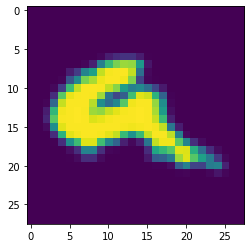

In [ ]:
plt.imshow(test_img[misclassified_images[0]].reshape(28, 28))

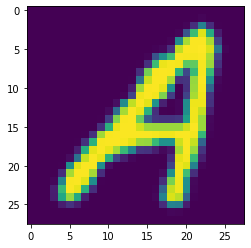

In [ ]:
plt.imshow(test_img[misclassified_images[1]].reshape(28, 28))

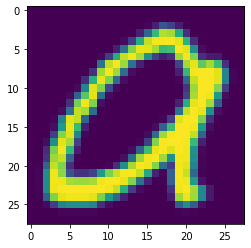

In [ ]:
plt.imshow(test_img[misclassified_images[2]].reshape(28, 28))

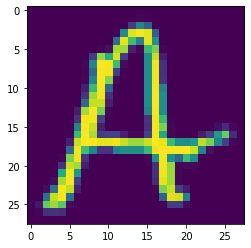

In [ ]:
plt.imshow(test_img[misclassified_images[3]].reshape(28, 28))

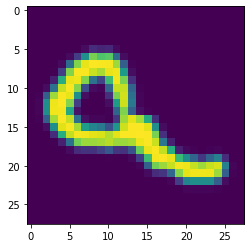

In [ ]:
plt.imshow(test_img[misclassified_images[4]].reshape(28, 28))

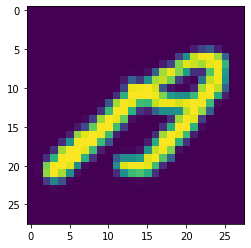

In [ ]:
plt.imshow(test_img[misclassified_images[5]].reshape(28, 28))

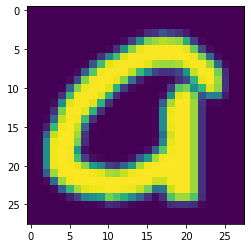

In [ ]:
plt.imshow(test_img[misclassified_images[6]].reshape(28, 28))

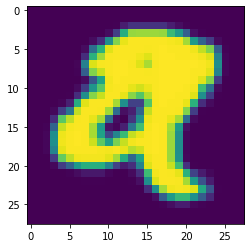

In [ ]:
plt.imshow(test_img[misclassified_images[7]].reshape(28, 28))

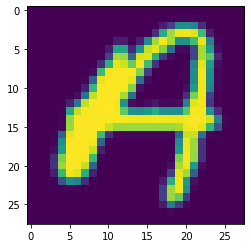

In [ ]:
plt.imshow(test_img[misclassified_images[-1]].reshape(28, 28))

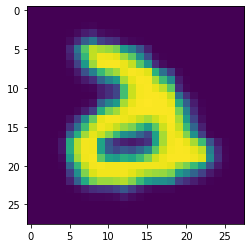

In [ ]:
plt.imshow(test_img[misclassified_images[-2]].reshape(28, 28))

## A: Many of the letters in the misclassified images resemble other letters. Although all the letters shown belong to the class label 'A', some closely resemble other letters such as lowercase 'q' or uppercase 'G' or 'D'. The confusion matrix in the EMNIST paper corroborates the idea that certain letter samples are more easily mistaken for other letter samples by the neural network, such as samples of A being more easily confused for G or Q. The misclassified samples we have here resemble the letters that were most prone to confusion with A.